# Qualité de l'air de la station Châtelet
 
# Partie 3 : Modèle ARIMA

------------------------------

Des précisions sur le modèle sont données dans l'annexe.

#### Sommaire

* Librairies
* Données
* Modèle de référence
* Modèle ARIMA
* Validation du modèle


# Librairies

In [40]:
import numpy as np
import pandas as pd
#---------------------------------------------------------------------#
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
#---------------------------------------------------------------------#
from sklearn.metrics import mean_squared_error
#---------------------------------------------------------------------#
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [41]:
pd.options.display.max_rows = 50
plt.rcParams['figure.figsize'] = [10,7]

# Données

Rappel : 
* nous avons choisi un échantillon de travail 'data_co2_ext' (air_chatelet_nbk_1_NETTOYAGE_DES_DONNEES.ipynb)
* nous l'avons ensuite séparé en deux parties : 'dataset' et 'valildation' (air_chatelet_nbk_2_ANALYSE_EXPLORATOIRE_DES_DONNEES.ipynb)
* nous utilisons ici 'dataset' pour construire nos modèles de prévision. 

In [42]:
dataset = pd.read_csv('datasets/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [43]:
dataset.head()

0
2020-06-01 00:00:00+00:00    427.0
2020-06-01 01:00:00+00:00    421.0
2020-06-01 02:00:00+00:00    421.0
2020-06-01 03:00:00+00:00    421.0
2020-06-01 04:00:00+00:00    421.0
Name: 1, dtype: float64

# Modèle de référence

Il s'agit d'un modèle très simple qui prédit la valeur suivante (à l'instant t+1) à l'aide de la valeur précédente (à l'instant t). 

#### Etapes du code : 
1. Préparer les données : on découpe 'dataset' en deux parties égales, trainset et testset
2. Prédire
    * Ici, le modèle est simple, il n'y a pas d'étape d'entraînement 
    * Le modele prédit la valeur suivante (à l'instant t+1) à l'aide de la valeur précédente (à l'instant t). 
3. Evaluer : on utilise la RMSE. 

#### On utilise deux listes :
* 'history' : 
    * au départ, elle contient les données du trainset
    * ensuite, à chaque étape de la boucle, la valeur du testset en cours est rajoutée à 'history'
* 'predictions' : qui enregistre toutes les valeurs prédites. 

In [44]:
# préparer les données
X = dataset.values
X = X.astype('float32')
trainsize = int(len(X) * 0.5)
train, test = X[0:trainsize], X[trainsize:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # prédire
    yhat = history[-1]  
    predictions.append(yhat)
    # mettre à jour les observations passées
    obs = test[i]
    history.append(obs)
    # afficher 
    print("Predicted : %.3f, Expected : %.3f" % (yhat, obs))

# évaluer le modèle
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

Predicted : 439.000, Expected : 428.000
Predicted : 428.000, Expected : 427.000
Predicted : 427.000, Expected : 435.000
Predicted : 435.000, Expected : 443.000
Predicted : 443.000, Expected : 457.000
Predicted : 457.000, Expected : 461.000
Predicted : 461.000, Expected : 470.000
Predicted : 470.000, Expected : 491.000
Predicted : 491.000, Expected : 537.000
Predicted : 537.000, Expected : 560.000
Predicted : 560.000, Expected : 565.000
Predicted : 565.000, Expected : 547.000
Predicted : 547.000, Expected : 546.000
Predicted : 546.000, Expected : 563.000
Predicted : 563.000, Expected : 572.000
Predicted : 572.000, Expected : 576.000
Predicted : 576.000, Expected : 606.000
Predicted : 606.000, Expected : 635.000
Predicted : 635.000, Expected : 650.000
Predicted : 650.000, Expected : 643.000
Predicted : 643.000, Expected : 599.000
Predicted : 599.000, Expected : 544.000
Predicted : 544.000, Expected : 490.000
Predicted : 490.000, Expected : 481.000
Predicted : 481.000, Expected : 477.000


Predicted : 553.000, Expected : 566.000
Predicted : 566.000, Expected : 602.000
Predicted : 602.000, Expected : 672.000
Predicted : 672.000, Expected : 607.000
Predicted : 607.000, Expected : 492.000
Predicted : 492.000, Expected : 460.000
Predicted : 460.000, Expected : 451.000
Predicted : 451.000, Expected : 448.000
Predicted : 448.000, Expected : 445.000
Predicted : 445.000, Expected : 443.000
Predicted : 443.000, Expected : 438.000
Predicted : 438.000, Expected : 434.000
Predicted : 434.000, Expected : 431.000
Predicted : 431.000, Expected : 433.000
Predicted : 433.000, Expected : 433.000
Predicted : 433.000, Expected : 440.000
Predicted : 440.000, Expected : 448.000
Predicted : 448.000, Expected : 458.000
Predicted : 458.000, Expected : 471.000
Predicted : 471.000, Expected : 494.000
Predicted : 494.000, Expected : 523.000
Predicted : 523.000, Expected : 557.000
Predicted : 557.000, Expected : 549.000
Predicted : 549.000, Expected : 570.000
Predicted : 570.000, Expected : 592.000


Predicted : 441.000, Expected : 445.000
Predicted : 445.000, Expected : 450.000
Predicted : 450.000, Expected : 446.000
Predicted : 446.000, Expected : 444.000
Predicted : 444.000, Expected : 445.000
Predicted : 445.000, Expected : 439.000
Predicted : 439.000, Expected : 437.000
Predicted : 437.000, Expected : 437.000
Predicted : 437.000, Expected : 444.000
Predicted : 444.000, Expected : 473.000
Predicted : 473.000, Expected : 474.000
Predicted : 474.000, Expected : 475.000
Predicted : 475.000, Expected : 477.000
Predicted : 477.000, Expected : 482.000
Predicted : 482.000, Expected : 481.000
Predicted : 481.000, Expected : 479.000
Predicted : 479.000, Expected : 471.000
Predicted : 471.000, Expected : 452.000
Predicted : 452.000, Expected : 449.000
Predicted : 449.000, Expected : 451.000
Predicted : 451.000, Expected : 445.000
Predicted : 445.000, Expected : 442.000
Predicted : 442.000, Expected : 439.000
Predicted : 439.000, Expected : 436.000
Predicted : 436.000, Expected : 438.000


Predicted : 594.000, Expected : 604.000
Predicted : 604.000, Expected : 637.000
Predicted : 637.000, Expected : 618.000
Predicted : 618.000, Expected : 597.000
Predicted : 597.000, Expected : 570.000
Predicted : 570.000, Expected : 578.000
Predicted : 578.000, Expected : 473.000
Predicted : 473.000, Expected : 456.000
Predicted : 456.000, Expected : 445.000
Predicted : 445.000, Expected : 435.000
Predicted : 435.000, Expected : 437.000
Predicted : 437.000, Expected : 438.000
Predicted : 438.000, Expected : 438.000
Predicted : 438.000, Expected : 440.000
Predicted : 440.000, Expected : 442.000
Predicted : 442.000, Expected : 438.000
Predicted : 438.000, Expected : 440.000
Predicted : 440.000, Expected : 442.000
Predicted : 442.000, Expected : 443.000
Predicted : 443.000, Expected : 444.000
Predicted : 444.000, Expected : 445.000
Predicted : 445.000, Expected : 446.000
Predicted : 446.000, Expected : 449.000
Predicted : 449.000, Expected : 454.000
Predicted : 454.000, Expected : 458.000


Ce premier modèle est convenable, la RMSE = 28.481 est assez faible (moyenne des données = 492 ; 28/492*100 ~ 6%).

# Modèle ARIMA

Des précisions sur le modèle sont données dans l'annexe.  
Nous configurons ici le modèle manuellellement. 

### Etape 1 : Différenciation

On supprime la saisonnalité de 24h observée précédemment : $z_t = y_t - y_{t-24}$. 

In [45]:
# fonction pour la différenciation
'''
* arguments 
    * les valeurs de la série
    * l'ordre de la différenciation 
* étapes
    * créer une liste pour récupérer les différences pour chaque temps
    * retourne cette liste sous forme de Series.
* Notons que les 24 premières heures sont supprimées. 
'''

def difference(dataset, interval=24):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [46]:
# préparer les données
X = dataset.values
X = X.astype('float32')

# différencier les données X (= valeurs de la séries 'dataset')
'''
Notons que la fonction 'difference' retourne une Series, il faut donc récupérer les index, 
c-à-d les dates dans la série originale
'''
hours_in_day = 24
stationary = difference(X, hours_in_day)
stationary.index = dataset.index[hours_in_day:]

In [47]:
stationary.head()

0
2020-06-02 00:00:00+00:00    14.0
2020-06-02 01:00:00+00:00    20.0
2020-06-02 02:00:00+00:00    10.0
2020-06-02 03:00:00+00:00     2.0
2020-06-02 04:00:00+00:00     1.0
dtype: float64

#### Vérifier la non-stationnarité

##### Visualisation

###### Sur l'ensemble des données

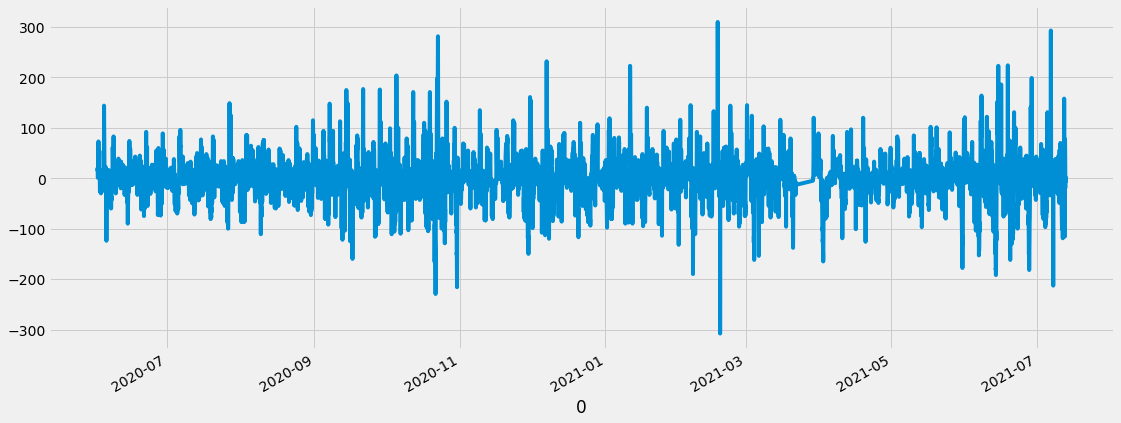

In [48]:
stationary.plot(figsize=(17,7));

###### Regroupement par mois

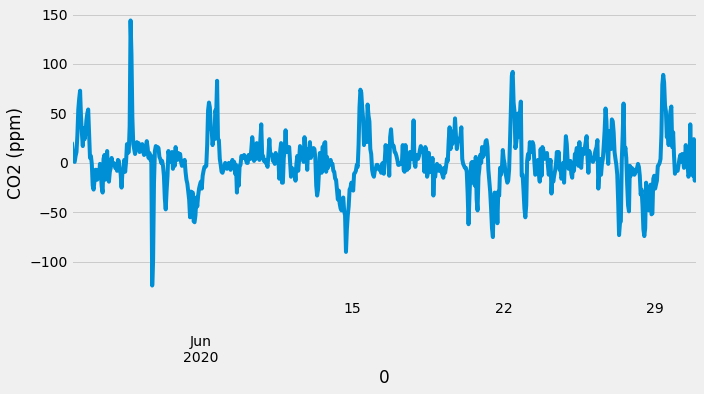

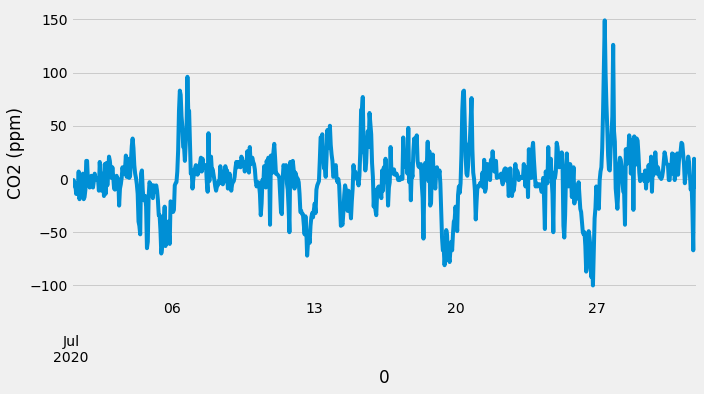

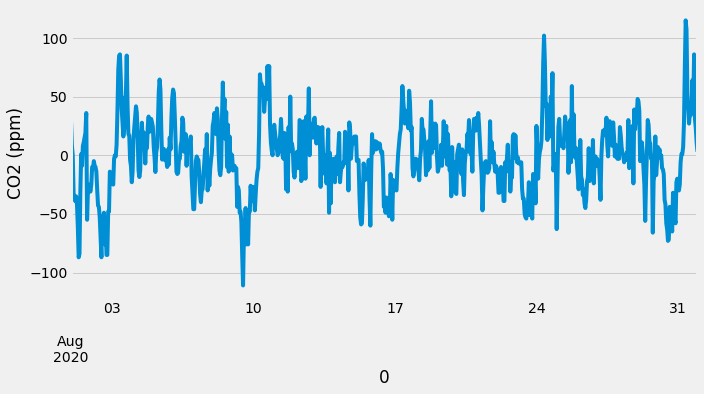

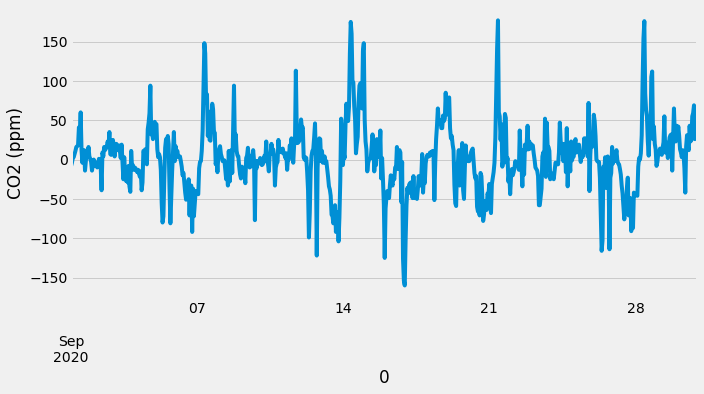

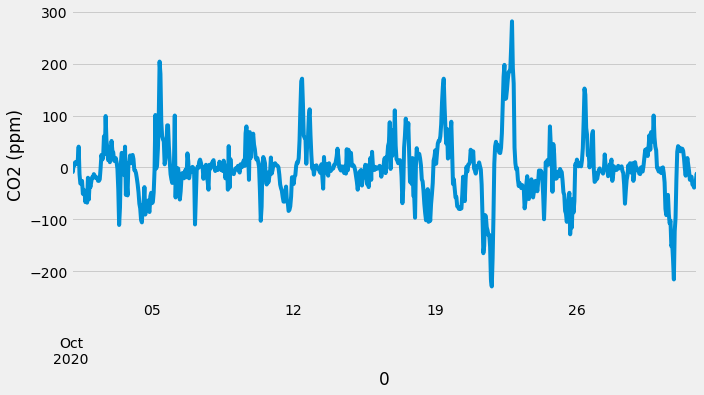

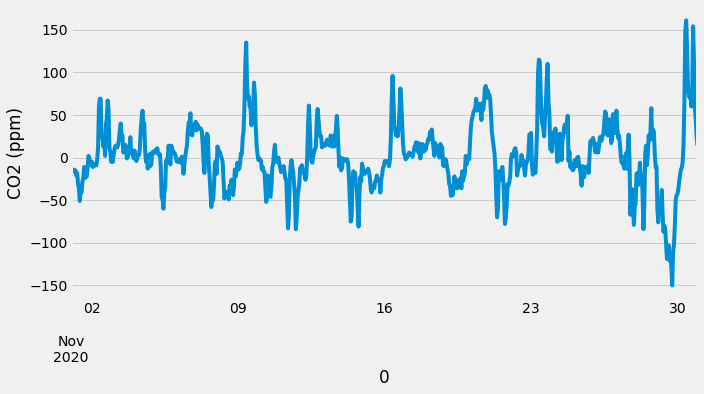

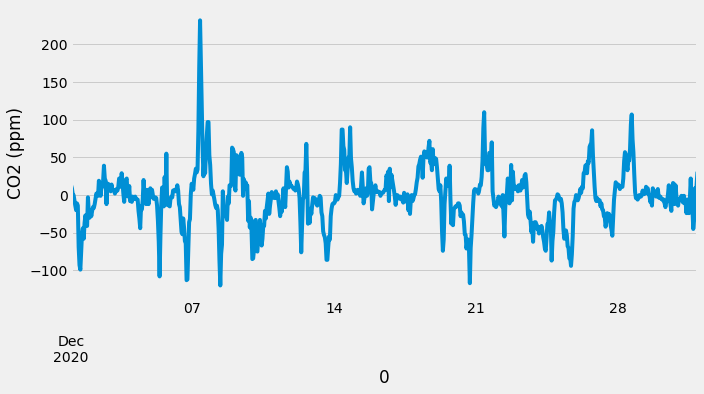

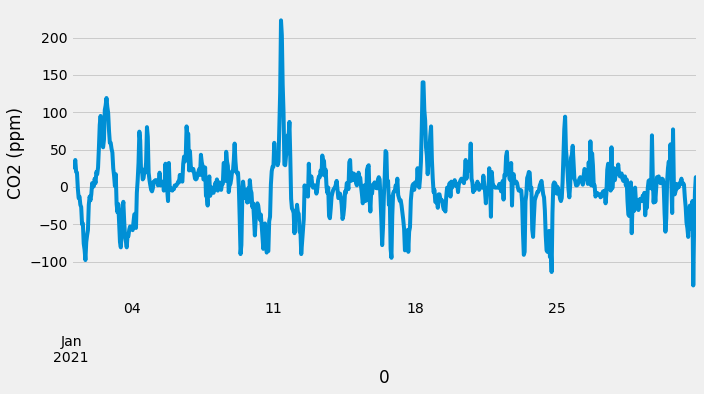

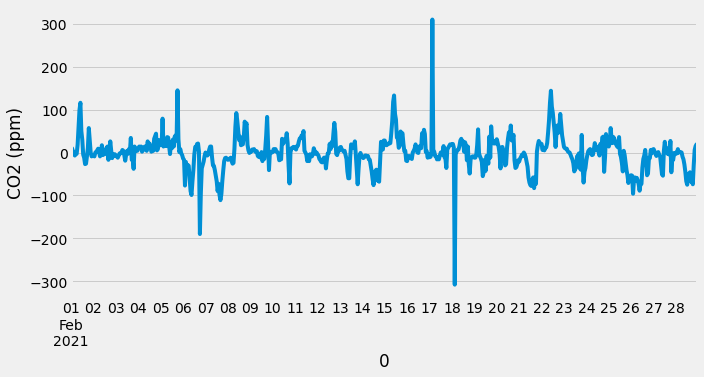

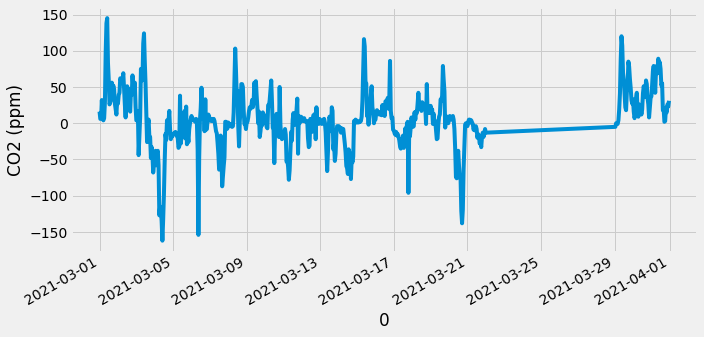

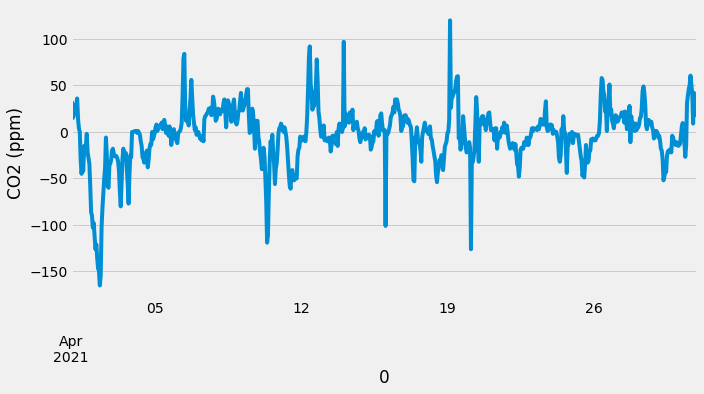

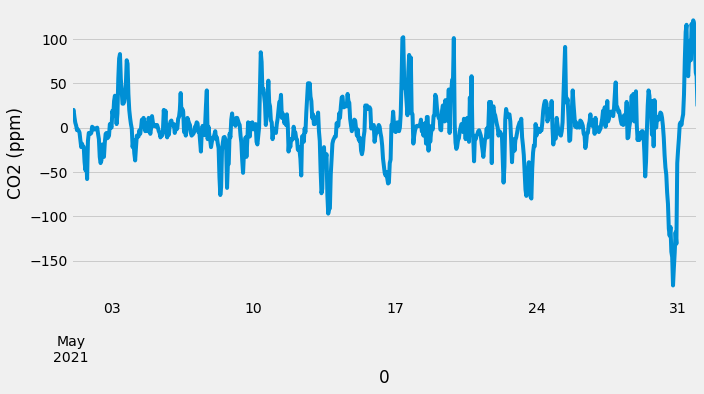

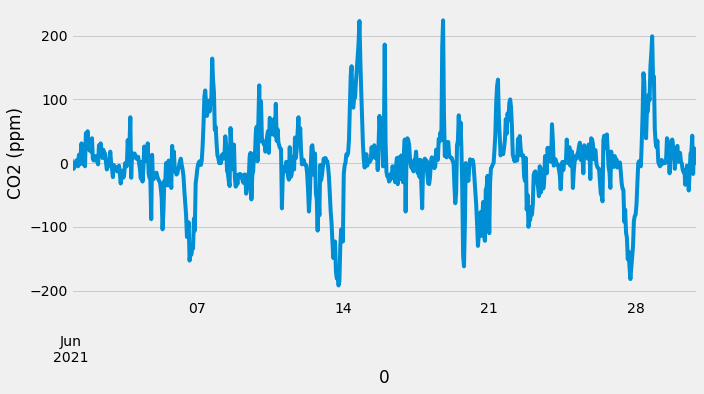

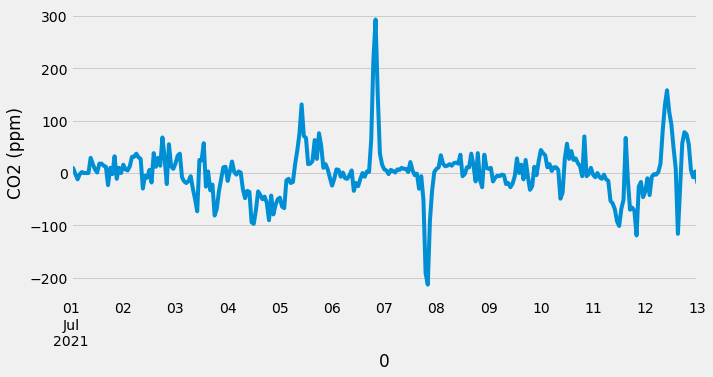

In [49]:
groups = stationary['2020-06':'2021-07'].groupby(pd.Grouper(freq='M'))

for name, group in groups:
    group.plot(figsize=(10,5))
    plt.ylabel('CO2 (ppm)')
    plt.show()
    print()

###### Sur des périodes de 7 jours

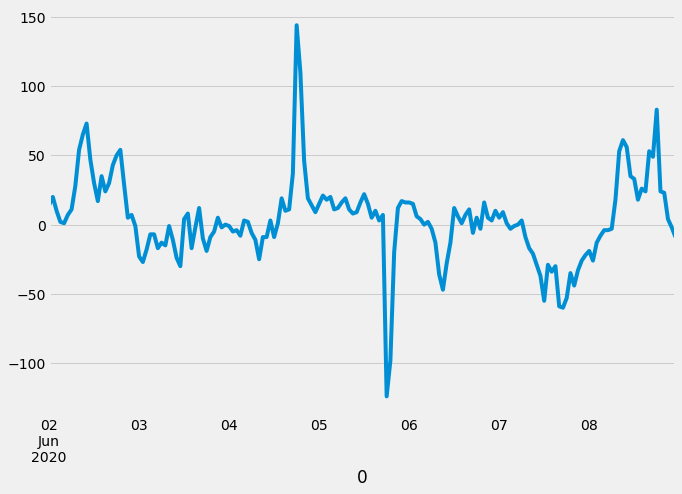

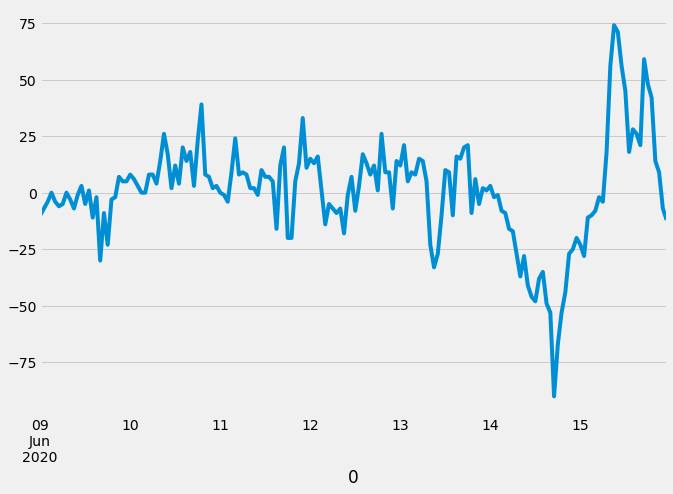

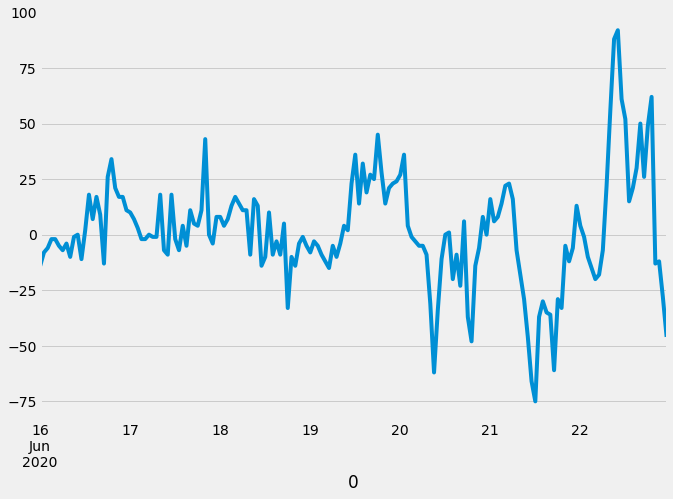

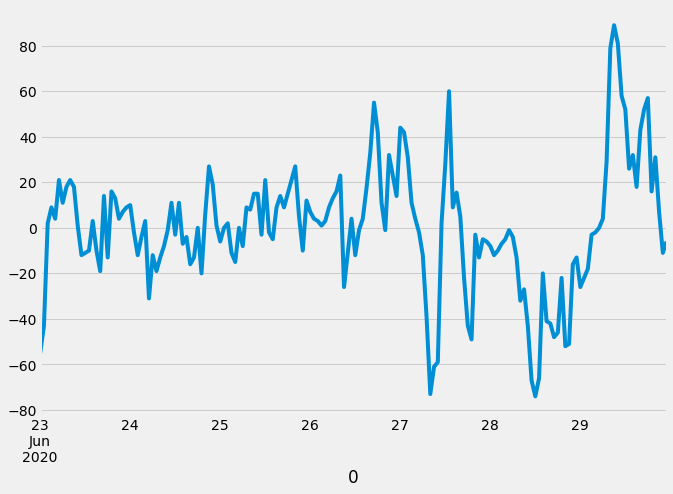

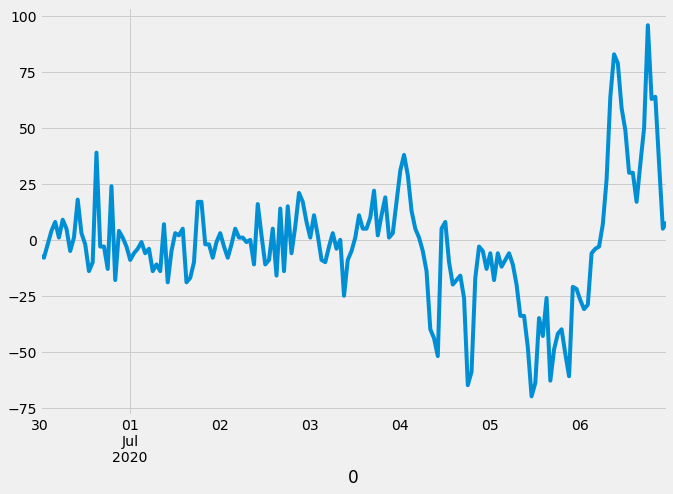

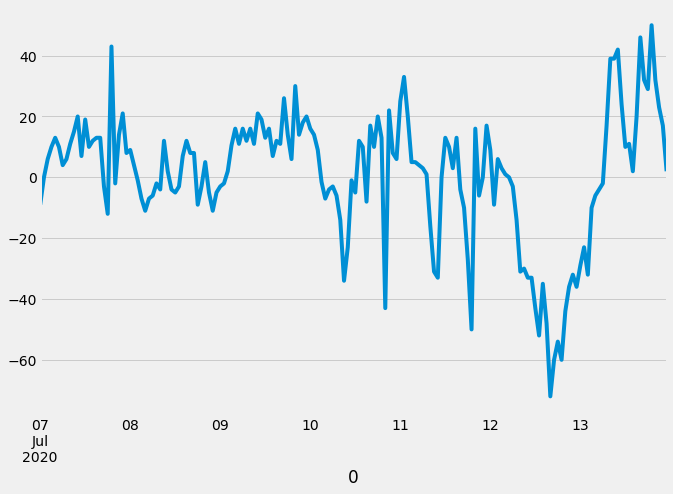

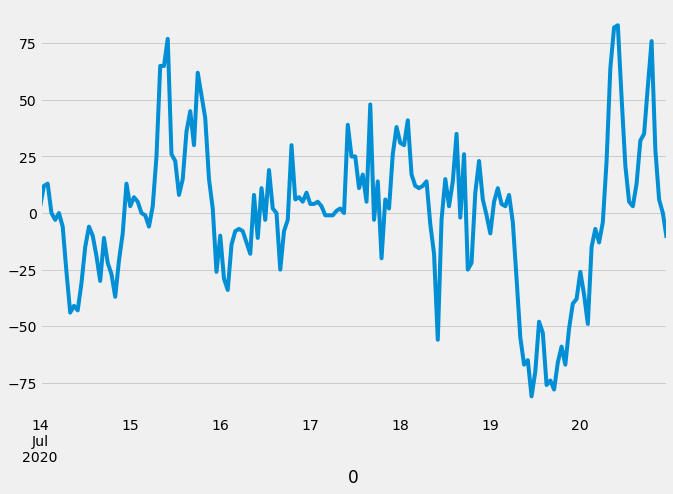

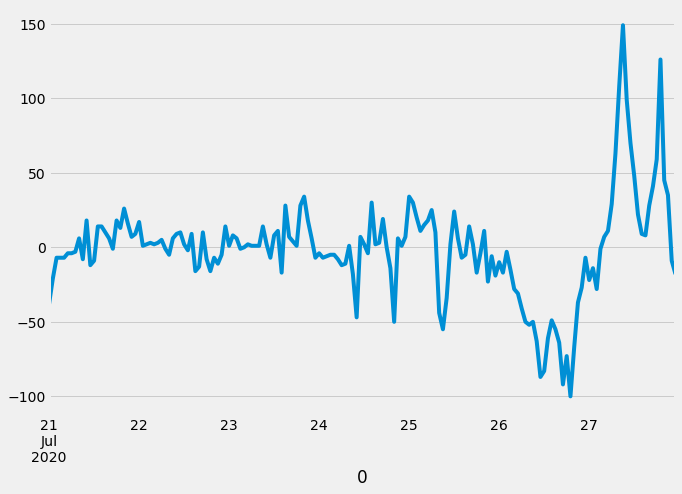

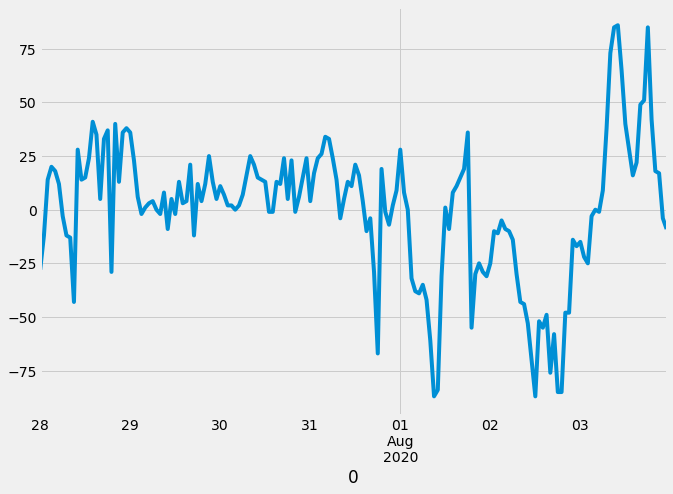

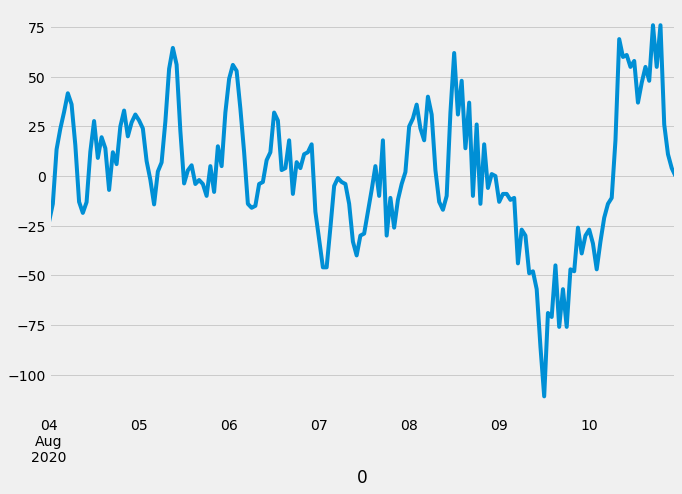

In [50]:
for k in range(0,10):
    stationary.iloc[168*k : 168*(k+1)].plot()
    plt.show()

Les cycles de 24h semblent avoir été éliminés quel que soit l'échelle, même si des pics semblent apparaître encore à des intervalles assez réguliers.     
Cependant, en regardant de plus près sur quelques périodes de 7 jours (168h), il ne semble plus y avoir de cycle évident. 

##### Test de Dickey-Fuller augmenté

In [51]:
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.015800
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


La p-valeur est inférieure à 5%, on rejette l'hypothèse $H_0$, le série est très probablement stationnaire.

#### Sauvegarder la série stationnarisée

In [52]:
stationary.to_csv('datasets/stationary.csv', header=False)

### Etape 2 : modèle ARIMA

#### Quels paramètres (p,d,q) choisir ? 

Comme la série semble stationnarisée, on peut prendre d=0 (aucune différenciation).  
Pour choisir p et q, nous analysons l'ACF et le PACF.

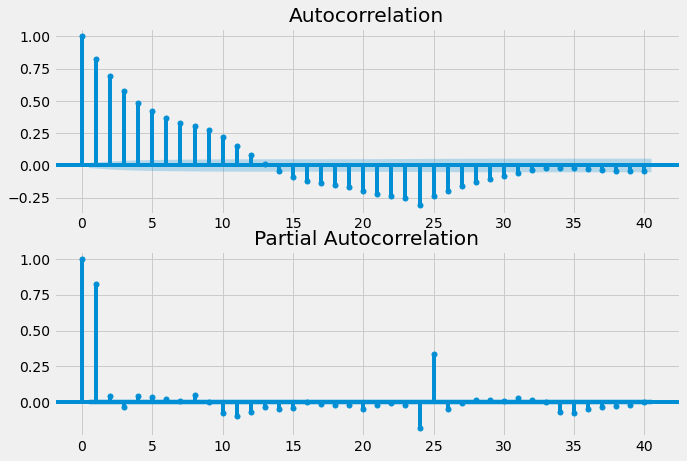

In [53]:
# acf, pacf
plt.figure()
plt.subplot(211)
plot_acf(stationary.values, ax=plt.gca())
plt.subplot(212)
plot_pacf(stationary.values, ax=plt.gca());

Cela suggère un modèle ARIMA(2,0,0). 

#### Entraînement et évaluation du modèle ARIMA

Nous allons entraîner un modèle ARIMA par 'walk-forward validation' sur nos données 'dataset', en intégrant l'étape de différenciation. 

Plus précisément :
* on sépare les données en 2 parties : 
    * la 1e moitié est réservée à l'entraînement ('train')
    * la 2e moitié ('test') est utilisée de manière itérative pour pour l'entraînement et les prédictions
* plus précisément :     
    * on différencie les données d'entraînement
    * on entraîne le modèle ARIMA sur les données différenciées
    * on utilise le modèle pour prédire la valeur à l'heure suivante
    * on ajoute la 1e valeur de 'test' dans 'train'
    * on recommence ces étapes.

Notons que dans l'étape de prédiction, il faut rajouter ce qui a été enlevé dans l'étape de différenciation. 

A la fin, on évalue avec la RMSE. 

In [54]:
# fonction pour la différenciation
# attention : on retourne cette fois une liste, et non une series
def difference(dataset, interval=24):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# fonction pour inverser la différenciation
def inverse_difference(history, yhat, interval=24):
    return yhat + history[-interval]

In [55]:
# préparer les données
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[train_size:]

In [56]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # différencier les données
    hours_in_day = 24
    diff = difference(history, hours_in_day)
    # entraîner le modèle ARIMA
    model = ARIMA(diff, order=(2,0,0))
    model_fit = model.fit()
    # prédire l'heure suivante
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, hours_in_day)
    predictions.append(yhat)
    # mettre à jour 'history'
    obs = test[i]
    history.append(obs)
    # afficher les valeurs pour vérification
    print("Predicted : %.3f, Expected : %.3f" % (yhat, obs))
          
# évaluer le modèle
rmse = np.sqrt(mean_squared_error(test, predictions))
print("RMSE : %.3f" % rmse)

Predicted : 426.935, Expected : 428.000
Predicted : 419.859, Expected : 427.000
Predicted : 424.615, Expected : 435.000
Predicted : 434.135, Expected : 443.000
Predicted : 438.239, Expected : 457.000
Predicted : 451.657, Expected : 461.000
Predicted : 457.431, Expected : 470.000
Predicted : 479.415, Expected : 491.000
Predicted : 531.824, Expected : 537.000
Predicted : 577.452, Expected : 560.000
Predicted : 535.895, Expected : 565.000
Predicted : 529.684, Expected : 547.000
Predicted : 541.616, Expected : 546.000
Predicted : 550.711, Expected : 563.000
Predicted : 569.891, Expected : 572.000
Predicted : 568.241, Expected : 576.000
Predicted : 585.098, Expected : 606.000
Predicted : 615.765, Expected : 635.000
Predicted : 667.432, Expected : 650.000
Predicted : 634.839, Expected : 643.000
Predicted : 603.869, Expected : 599.000
Predicted : 511.075, Expected : 544.000
Predicted : 499.777, Expected : 490.000
Predicted : 473.989, Expected : 481.000
Predicted : 463.379, Expected : 477.000


Predicted : 471.666, Expected : 492.000
Predicted : 484.625, Expected : 490.000
Predicted : 484.300, Expected : 512.000
Predicted : 502.560, Expected : 516.000
Predicted : 506.460, Expected : 519.000
Predicted : 507.177, Expected : 535.000
Predicted : 529.243, Expected : 510.000
Predicted : 500.392, Expected : 488.000
Predicted : 463.249, Expected : 446.000
Predicted : 434.726, Expected : 421.000
Predicted : 422.935, Expected : 418.000
Predicted : 411.346, Expected : 414.000
Predicted : 410.563, Expected : 408.000
Predicted : 408.993, Expected : 406.000
Predicted : 407.306, Expected : 407.000
Predicted : 413.091, Expected : 404.000
Predicted : 403.519, Expected : 405.000
Predicted : 416.658, Expected : 407.000
Predicted : 412.145, Expected : 408.000
Predicted : 426.164, Expected : 415.000
Predicted : 424.552, Expected : 419.000
Predicted : 440.570, Expected : 423.000
Predicted : 432.835, Expected : 433.000
Predicted : 442.347, Expected : 448.000
Predicted : 471.548, Expected : 465.000


Predicted : 416.944, Expected : 418.000
Predicted : 413.193, Expected : 417.000
Predicted : 418.492, Expected : 414.000
Predicted : 431.506, Expected : 407.000
Predicted : 377.744, Expected : 416.000
Predicted : 418.430, Expected : 435.000
Predicted : 449.345, Expected : 474.000
Predicted : 465.724, Expected : 513.000
Predicted : 513.001, Expected : 513.000
Predicted : 508.716, Expected : 477.000
Predicted : 478.446, Expected : 484.000
Predicted : 501.287, Expected : 491.000
Predicted : 498.707, Expected : 502.000
Predicted : 496.144, Expected : 508.000
Predicted : 509.483, Expected : 510.000
Predicted : 509.152, Expected : 526.000
Predicted : 526.734, Expected : 579.000
Predicted : 569.023, Expected : 569.000
Predicted : 543.968, Expected : 506.000
Predicted : 470.848, Expected : 463.000
Predicted : 444.795, Expected : 439.000
Predicted : 438.824, Expected : 433.000
Predicted : 430.730, Expected : 428.000
Predicted : 422.977, Expected : 426.000
Predicted : 416.271, Expected : 425.000


Predicted : 548.356, Expected : 545.000
Predicted : 558.593, Expected : 566.000
Predicted : 597.122, Expected : 585.000
Predicted : 616.138, Expected : 658.000
Predicted : 667.917, Expected : 644.000
Predicted : 589.009, Expected : 596.000
Predicted : 493.605, Expected : 500.000
Predicted : 466.860, Expected : 459.000
Predicted : 445.529, Expected : 441.000
Predicted : 431.247, Expected : 432.000
Predicted : 430.039, Expected : 432.000
Predicted : 434.723, Expected : 433.000
Predicted : 435.067, Expected : 426.000
Predicted : 431.508, Expected : 436.000
Predicted : 427.451, Expected : 439.000
Predicted : 439.560, Expected : 446.000
Predicted : 464.860, Expected : 466.000
Predicted : 509.069, Expected : 520.000
Predicted : 586.601, Expected : 584.000
Predicted : 577.658, Expected : 606.000
Predicted : 558.385, Expected : 555.000
Predicted : 534.253, Expected : 542.000
Predicted : 563.674, Expected : 549.000
Predicted : 547.948, Expected : 558.000
Predicted : 564.461, Expected : 545.000


Predicted : 440.602, Expected : 434.000
Predicted : 432.689, Expected : 435.000
Predicted : 440.188, Expected : 443.000
Predicted : 464.727, Expected : 463.000
Predicted : 510.055, Expected : 509.000
Predicted : 561.204, Expected : 577.000
Predicted : 570.677, Expected : 562.000
Predicted : 532.478, Expected : 523.000
Predicted : 532.010, Expected : 515.000
Predicted : 520.491, Expected : 537.000
Predicted : 561.272, Expected : 554.000
Predicted : 556.458, Expected : 556.000
Predicted : 556.271, Expected : 588.000
Predicted : 630.068, Expected : 608.000
Predicted : 681.315, Expected : 642.000
Predicted : 569.352, Expected : 623.000
Predicted : 526.684, Expected : 515.000
Predicted : 470.352, Expected : 468.000
Predicted : 455.753, Expected : 454.000
Predicted : 446.056, Expected : 445.000
Predicted : 437.205, Expected : 437.000
Predicted : 430.200, Expected : 430.000
Predicted : 436.200, Expected : 436.000
Predicted : 437.200, Expected : 437.000
Predicted : 433.200, Expected : 438.000


Predicted : 560.373, Expected : 631.000
Predicted : 680.797, Expected : 636.000
Predicted : 604.502, Expected : 572.000
Predicted : 474.567, Expected : 488.000
Predicted : 468.519, Expected : 452.000
Predicted : 421.273, Expected : 436.000
Predicted : 421.196, Expected : 436.000
Predicted : 432.891, Expected : 435.000
Predicted : 430.013, Expected : 433.000
Predicted : 430.850, Expected : 427.000
Predicted : 424.840, Expected : 423.000
Predicted : 420.282, Expected : 424.000
Predicted : 421.767, Expected : 426.000
Predicted : 431.301, Expected : 432.000
Predicted : 447.489, Expected : 438.000
Predicted : 490.281, Expected : 455.000
Predicted : 496.912, Expected : 467.000
Predicted : 481.542, Expected : 490.000
Predicted : 461.425, Expected : 504.000
Predicted : 514.588, Expected : 534.000
Predicted : 554.015, Expected : 567.000
Predicted : 574.676, Expected : 562.000
Predicted : 560.663, Expected : 604.000
Predicted : 633.868, Expected : 592.000
Predicted : 636.494, Expected : 596.000


Predicted : 442.679, Expected : 445.000
Predicted : 455.783, Expected : 433.000
Predicted : 450.177, Expected : 429.000
Predicted : 445.142, Expected : 439.000
Predicted : 462.037, Expected : 447.000
Predicted : 466.775, Expected : 447.000
Predicted : 477.904, Expected : 456.000
Predicted : 525.983, Expected : 492.000
Predicted : 497.798, Expected : 500.000
Predicted : 536.488, Expected : 499.000
Predicted : 535.255, Expected : 507.000
Predicted : 521.928, Expected : 518.000
Predicted : 514.297, Expected : 529.000
Predicted : 466.285, Expected : 481.000
Predicted : 432.373, Expected : 448.000
Predicted : 428.901, Expected : 433.000
Predicted : 434.995, Expected : 434.000
Predicted : 436.920, Expected : 432.000
Predicted : 427.457, Expected : 423.000
Predicted : 421.762, Expected : 420.000
Predicted : 416.559, Expected : 416.000
Predicted : 416.224, Expected : 416.000
Predicted : 424.904, Expected : 415.000
Predicted : 424.326, Expected : 415.000
Predicted : 423.257, Expected : 421.000


Predicted : 545.459, Expected : 556.000
Predicted : 517.737, Expected : 500.000
Predicted : 481.968, Expected : 468.000
Predicted : 459.664, Expected : 461.000
Predicted : 470.386, Expected : 448.000
Predicted : 448.263, Expected : 444.000
Predicted : 433.282, Expected : 441.000
Predicted : 436.425, Expected : 436.000
Predicted : 439.327, Expected : 434.000
Predicted : 435.006, Expected : 432.000
Predicted : 434.148, Expected : 430.000
Predicted : 434.478, Expected : 447.000
Predicted : 468.942, Expected : 473.000
Predicted : 507.365, Expected : 513.000
Predicted : 553.549, Expected : 565.000
Predicted : 575.900, Expected : 571.000
Predicted : 531.309, Expected : 522.000
Predicted : 524.108, Expected : 523.000
Predicted : 533.207, Expected : 548.000
Predicted : 550.678, Expected : 554.000
Predicted : 553.605, Expected : 551.000
Predicted : 551.452, Expected : 588.000
Predicted : 618.535, Expected : 603.000
Predicted : 623.631, Expected : 658.000
Predicted : 600.256, Expected : 599.000


Predicted : 522.867, Expected : 534.000
Predicted : 568.262, Expected : 585.000
Predicted : 592.533, Expected : 588.000
Predicted : 533.257, Expected : 527.000
Predicted : 520.586, Expected : 529.000
Predicted : 558.426, Expected : 554.000
Predicted : 573.365, Expected : 561.000
Predicted : 561.898, Expected : 587.000
Predicted : 600.289, Expected : 586.000
Predicted : 595.817, Expected : 629.000
Predicted : 657.354, Expected : 667.000
Predicted : 700.588, Expected : 625.000
Predicted : 520.847, Expected : 544.000
Predicted : 475.046, Expected : 528.000
Predicted : 508.034, Expected : 501.000
Predicted : 491.403, Expected : 488.000
Predicted : 480.121, Expected : 478.000
Predicted : 468.887, Expected : 479.000
Predicted : 480.868, Expected : 520.000
Predicted : 510.504, Expected : 497.000
Predicted : 491.765, Expected : 486.000
Predicted : 473.754, Expected : 491.000
Predicted : 490.159, Expected : 492.000
Predicted : 514.958, Expected : 513.000
Predicted : 554.265, Expected : 552.000


Predicted : 478.526, Expected : 462.000
Predicted : 441.405, Expected : 442.000
Predicted : 434.700, Expected : 431.000
Predicted : 419.139, Expected : 418.000
Predicted : 423.664, Expected : 423.000
Predicted : 425.324, Expected : 423.000
Predicted : 423.414, Expected : 423.000
Predicted : 426.983, Expected : 423.000
Predicted : 429.503, Expected : 423.000
Predicted : 429.272, Expected : 424.000
Predicted : 454.520, Expected : 437.000
Predicted : 488.436, Expected : 484.000
Predicted : 543.375, Expected : 608.000
Predicted : 573.431, Expected : 517.000
Predicted : 478.830, Expected : 481.000
Predicted : 493.632, Expected : 490.000
Predicted : 504.308, Expected : 514.000
Predicted : 520.453, Expected : 531.000
Predicted : 529.675, Expected : 543.000
Predicted : 596.590, Expected : 562.000
Predicted : 569.354, Expected : 608.000
Predicted : 640.075, Expected : 594.000
Predicted : 556.412, Expected : 562.000
Predicted : 492.140, Expected : 480.000
Predicted : 440.924, Expected : 454.000


Predicted : 468.692, Expected : 482.000
Predicted : 459.721, Expected : 489.000
Predicted : 492.283, Expected : 507.000
Predicted : 529.834, Expected : 526.000
Predicted : 549.785, Expected : 536.000
Predicted : 524.566, Expected : 555.000
Predicted : 575.718, Expected : 576.000
Predicted : 616.324, Expected : 566.000
Predicted : 576.668, Expected : 577.000
Predicted : 565.278, Expected : 536.000
Predicted : 457.147, Expected : 457.000
Predicted : 423.815, Expected : 445.000
Predicted : 423.162, Expected : 432.000
Predicted : 433.259, Expected : 433.000
Predicted : 428.715, Expected : 428.000
Predicted : 425.715, Expected : 424.000
Predicted : 423.933, Expected : 421.000
Predicted : 427.324, Expected : 420.000
Predicted : 417.543, Expected : 421.000
Predicted : 421.958, Expected : 420.000
Predicted : 421.451, Expected : 420.000
Predicted : 432.405, Expected : 421.000
Predicted : 437.588, Expected : 424.000
Predicted : 440.314, Expected : 423.000
Predicted : 449.474, Expected : 423.000


Predicted : 442.414, Expected : 447.000
Predicted : 445.071, Expected : 439.000
Predicted : 441.481, Expected : 447.000
Predicted : 445.508, Expected : 450.000
Predicted : 450.785, Expected : 450.000
Predicted : 446.232, Expected : 446.000
Predicted : 449.186, Expected : 454.000
Predicted : 452.096, Expected : 468.000
Predicted : 466.056, Expected : 492.000
Predicted : 486.951, Expected : 542.000
Predicted : 525.746, Expected : 575.000
Predicted : 556.982, Expected : 566.000
Predicted : 551.252, Expected : 532.000
Predicted : 527.657, Expected : 528.000
Predicted : 529.167, Expected : 519.000
Predicted : 512.048, Expected : 500.000
Predicted : 505.049, Expected : 504.000
Predicted : 492.112, Expected : 520.000
Predicted : 513.522, Expected : 531.000
Predicted : 529.695, Expected : 572.000
Predicted : 565.975, Expected : 575.000
Predicted : 530.967, Expected : 527.000
Predicted : 503.328, Expected : 501.000
Predicted : 491.164, Expected : 482.000
Predicted : 474.301, Expected : 474.000


Predicted : 475.220, Expected : 463.000
Predicted : 468.618, Expected : 474.000
Predicted : 479.163, Expected : 479.000
Predicted : 481.971, Expected : 478.000
Predicted : 471.104, Expected : 488.000
Predicted : 491.471, Expected : 509.000
Predicted : 504.435, Expected : 531.000
Predicted : 521.799, Expected : 513.000
Predicted : 491.670, Expected : 479.000
Predicted : 449.627, Expected : 444.000
Predicted : 443.526, Expected : 436.000
Predicted : 428.072, Expected : 431.000
Predicted : 425.049, Expected : 418.000
Predicted : 415.863, Expected : 416.000
Predicted : 415.304, Expected : 417.000
Predicted : 420.927, Expected : 418.000
Predicted : 419.645, Expected : 415.000
Predicted : 419.356, Expected : 417.000
Predicted : 423.392, Expected : 421.000
Predicted : 434.559, Expected : 438.000
Predicted : 473.463, Expected : 467.000
Predicted : 505.943, Expected : 528.000
Predicted : 536.630, Expected : 543.000
Predicted : 490.045, Expected : 494.000
Predicted : 477.966, Expected : 483.000


Predicted : 534.862, Expected : 542.000
Predicted : 455.021, Expected : 444.000
Predicted : 440.868, Expected : 442.000
Predicted : 437.731, Expected : 436.000
Predicted : 440.068, Expected : 442.000
Predicted : 446.398, Expected : 446.000
Predicted : 461.526, Expected : 460.000
Predicted : 502.734, Expected : 487.000
Predicted : 516.826, Expected : 516.000
Predicted : 510.562, Expected : 513.000
Predicted : 489.644, Expected : 489.000
Predicted : 475.647, Expected : 485.000
Predicted : 498.391, Expected : 496.000
Predicted : 501.485, Expected : 504.000
Predicted : 501.731, Expected : 512.000
Predicted : 523.768, Expected : 527.000
Predicted : 544.984, Expected : 531.000
Predicted : 542.370, Expected : 548.000
Predicted : 532.228, Expected : 548.000
Predicted : 505.391, Expected : 511.000
Predicted : 480.610, Expected : 473.000
Predicted : 455.994, Expected : 450.000
Predicted : 447.990, Expected : 447.000
Predicted : 440.902, Expected : 442.000
Predicted : 543.651, Expected : 441.000


Predicted : 488.722, Expected : 495.000
Predicted : 495.603, Expected : 493.000
Predicted : 505.909, Expected : 522.000
Predicted : 531.459, Expected : 546.000
Predicted : 547.019, Expected : 525.000
Predicted : 519.489, Expected : 515.000
Predicted : 485.037, Expected : 486.000
Predicted : 450.636, Expected : 455.000
Predicted : 444.825, Expected : 448.000
Predicted : 445.583, Expected : 447.000
Predicted : 450.677, Expected : 451.000
Predicted : 450.892, Expected : 443.000
Predicted : 436.775, Expected : 440.000
Predicted : 440.497, Expected : 439.000
Predicted : 439.112, Expected : 438.000
Predicted : 437.233, Expected : 438.000
Predicted : 443.972, Expected : 439.000
Predicted : 454.091, Expected : 447.000
Predicted : 473.144, Expected : 454.000
Predicted : 469.507, Expected : 460.000
Predicted : 461.569, Expected : 463.000
Predicted : 452.882, Expected : 477.000
Predicted : 475.209, Expected : 472.000
Predicted : 483.585, Expected : 502.000
Predicted : 508.279, Expected : 496.000


Predicted : 449.067, Expected : 447.000
Predicted : 448.448, Expected : 448.000
Predicted : 451.355, Expected : 452.000
Predicted : 458.140, Expected : 457.000
Predicted : 461.401, Expected : 463.000
Predicted : 472.926, Expected : 466.000
Predicted : 475.519, Expected : 468.000
Predicted : 477.476, Expected : 455.000
Predicted : 462.477, Expected : 449.000
Predicted : 457.036, Expected : 453.000
Predicted : 472.064, Expected : 484.000
Predicted : 492.352, Expected : 481.000
Predicted : 495.121, Expected : 485.000
Predicted : 482.768, Expected : 493.000
Predicted : 495.108, Expected : 503.000
Predicted : 493.717, Expected : 494.000
Predicted : 495.972, Expected : 489.000
Predicted : 476.303, Expected : 475.000
Predicted : 458.807, Expected : 459.000
Predicted : 445.426, Expected : 457.000
Predicted : 453.736, Expected : 453.000
Predicted : 452.773, Expected : 451.000
Predicted : 452.108, Expected : 471.000
Predicted : 462.946, Expected : 461.000
Predicted : 458.121, Expected : 477.000


Predicted : 506.596, Expected : 516.000
Predicted : 519.395, Expected : 542.000
Predicted : 549.597, Expected : 576.000
Predicted : 565.253, Expected : 550.000
Predicted : 519.454, Expected : 519.000
Predicted : 484.184, Expected : 472.000
Predicted : 460.401, Expected : 459.000
Predicted : 467.110, Expected : 449.000
Predicted : 439.054, Expected : 448.000
Predicted : 448.655, Expected : 445.000
Predicted : 441.042, Expected : 440.000
Predicted : 442.863, Expected : 441.000
Predicted : 428.075, Expected : 437.000
Predicted : 435.906, Expected : 443.000
Predicted : 447.081, Expected : 459.000
Predicted : 472.226, Expected : 485.000
Predicted : 531.764, Expected : 536.000
Predicted : 565.380, Expected : 579.000
Predicted : 552.427, Expected : 533.000
Predicted : 495.349, Expected : 501.000
Predicted : 507.123, Expected : 507.000
Predicted : 527.985, Expected : 522.000
Predicted : 520.549, Expected : 527.000
Predicted : 515.916, Expected : 510.000
Predicted : 518.885, Expected : 531.000


Predicted : 434.360, Expected : 437.000
Predicted : 447.977, Expected : 436.000
Predicted : 459.964, Expected : 458.000
Predicted : 485.569, Expected : 507.000
Predicted : 546.899, Expected : 557.000
Predicted : 542.589, Expected : 532.000
Predicted : 501.002, Expected : 499.000
Predicted : 492.986, Expected : 518.000
Predicted : 524.810, Expected : 517.000
Predicted : 538.791, Expected : 532.000
Predicted : 522.079, Expected : 534.000
Predicted : 537.377, Expected : 565.000
Predicted : 606.807, Expected : 566.000
Predicted : 550.156, Expected : 583.000
Predicted : 587.438, Expected : 605.000
Predicted : 534.697, Expected : 555.000
Predicted : 512.442, Expected : 521.000
Predicted : 499.223, Expected : 556.000
Predicted : 531.092, Expected : 453.000
Predicted : 471.674, Expected : 447.000
Predicted : 448.799, Expected : 438.000
Predicted : 433.357, Expected : 432.000
Predicted : 431.417, Expected : 435.000
Predicted : 429.071, Expected : 429.000
Predicted : 426.954, Expected : 433.000


Predicted : 594.003, Expected : 597.000
Predicted : 603.003, Expected : 601.000
Predicted : 548.064, Expected : 559.000
Predicted : 517.934, Expected : 538.000
Predicted : 516.939, Expected : 537.000
Predicted : 480.893, Expected : 460.000
Predicted : 453.829, Expected : 458.000
Predicted : 443.079, Expected : 442.000
Predicted : 432.229, Expected : 436.000
Predicted : 432.796, Expected : 431.000
Predicted : 433.901, Expected : 430.000
Predicted : 433.953, Expected : 431.000
Predicted : 441.536, Expected : 442.000
Predicted : 461.359, Expected : 461.000
Predicted : 485.572, Expected : 497.000
Predicted : 542.193, Expected : 540.000
Predicted : 530.742, Expected : 533.000
Predicted : 498.308, Expected : 519.000
Predicted : 540.321, Expected : 505.000
Predicted : 519.869, Expected : 517.000
Predicted : 522.836, Expected : 532.000
Predicted : 537.544, Expected : 544.000
Predicted : 560.758, Expected : 576.000
Predicted : 592.052, Expected : 612.000
Predicted : 626.277, Expected : 607.000


Predicted : 444.088, Expected : 429.000
Predicted : 464.132, Expected : 442.000
Predicted : 509.850, Expected : 451.000
Predicted : 461.580, Expected : 470.000
Predicted : 455.179, Expected : 492.000
Predicted : 518.308, Expected : 510.000
Predicted : 517.936, Expected : 546.000
Predicted : 557.363, Expected : 541.000
Predicted : 551.885, Expected : 531.000
Predicted : 566.641, Expected : 599.000
Predicted : 625.450, Expected : 592.000
Predicted : 584.093, Expected : 599.000
Predicted : 614.587, Expected : 585.000
Predicted : 522.910, Expected : 581.000
Predicted : 561.256, Expected : 530.000
Predicted : 511.983, Expected : 538.000
Predicted : 468.526, Expected : 445.000
Predicted : 438.107, Expected : 431.000
Predicted : 425.543, Expected : 419.000
Predicted : 415.204, Expected : 414.000
Predicted : 411.567, Expected : 416.000
Predicted : 415.155, Expected : 419.000
Predicted : 415.431, Expected : 422.000
Predicted : 422.172, Expected : 427.000
Predicted : 434.664, Expected : 426.000


Predicted : 458.415, Expected : 434.000
Predicted : 402.045, Expected : 427.000
Predicted : 411.743, Expected : 421.000
Predicted : 445.034, Expected : 427.000
Predicted : 459.247, Expected : 426.000
Predicted : 343.526, Expected : 429.000
Predicted : 408.494, Expected : 425.000
Predicted : 421.880, Expected : 427.000
Predicted : 428.545, Expected : 442.000
Predicted : 437.997, Expected : 439.000
Predicted : 444.191, Expected : 450.000
Predicted : 452.201, Expected : 476.000
Predicted : 470.849, Expected : 526.000
Predicted : 495.611, Expected : 565.000
Predicted : 537.922, Expected : 577.000
Predicted : 550.990, Expected : 514.000
Predicted : 495.164, Expected : 503.000
Predicted : 501.287, Expected : 531.000
Predicted : 515.668, Expected : 533.000
Predicted : 516.602, Expected : 558.000
Predicted : 543.230, Expected : 585.000
Predicted : 562.402, Expected : 606.000
Predicted : 579.533, Expected : 628.000
Predicted : 592.221, Expected : 658.000
Predicted : 620.122, Expected : 597.000


Predicted : 560.394, Expected : 595.000
Predicted : 594.230, Expected : 576.000
Predicted : 517.367, Expected : 548.500
Predicted : 532.164, Expected : 521.000
Predicted : 539.275, Expected : 532.000
Predicted : 557.428, Expected : 557.000
Predicted : 558.360, Expected : 561.000
Predicted : 573.051, Expected : 542.000
Predicted : 567.066, Expected : 555.000
Predicted : 582.924, Expected : 614.000
Predicted : 659.984, Expected : 582.000
Predicted : 559.891, Expected : 567.000
Predicted : 564.001, Expected : 507.000
Predicted : 481.726, Expected : 473.000
Predicted : 482.093, Expected : 469.000
Predicted : 465.371, Expected : 471.000
Predicted : 469.188, Expected : 447.000
Predicted : 425.721, Expected : 428.000
Predicted : 388.728, Expected : 425.000
Predicted : 420.802, Expected : 425.000
Predicted : 428.047, Expected : 427.000
Predicted : 452.085, Expected : 434.000
Predicted : 459.523, Expected : 454.000
Predicted : 509.721, Expected : 496.000
Predicted : 563.625, Expected : 543.000


Predicted : 490.167, Expected : 505.000
Predicted : 497.657, Expected : 495.000
Predicted : 489.749, Expected : 493.000
Predicted : 472.017, Expected : 471.000
Predicted : 437.754, Expected : 428.000
Predicted : 438.921, Expected : 428.000
Predicted : 418.463, Expected : 426.000
Predicted : 423.837, Expected : 428.000
Predicted : 433.509, Expected : 432.000
Predicted : 452.137, Expected : 452.000
Predicted : 503.034, Expected : 503.000
Predicted : 545.034, Expected : 574.000
Predicted : 569.914, Expected : 564.000
Predicted : 525.943, Expected : 518.000
Predicted : 527.434, Expected : 522.000
Predicted : 531.185, Expected : 548.000
Predicted : 546.287, Expected : 550.000
Predicted : 560.164, Expected : 559.000
Predicted : 589.009, Expected : 589.000
Predicted : 654.225, Expected : 621.000
Predicted : 605.509, Expected : 633.000
Predicted : 689.732, Expected : 681.000
Predicted : 611.976, Expected : 645.000
Predicted : 581.167, Expected : 545.000
Predicted : 498.033, Expected : 515.000


Predicted : 506.793, Expected : 509.000
Predicted : 495.005, Expected : 506.000
Predicted : 520.416, Expected : 554.000
Predicted : 574.003, Expected : 552.000
Predicted : 559.236, Expected : 574.000
Predicted : 620.732, Expected : 596.000
Predicted : 597.204, Expected : 631.000
Predicted : 655.347, Expected : 630.000
Predicted : 664.363, Expected : 636.000
Predicted : 598.394, Expected : 599.000
Predicted : 536.822, Expected : 570.000
Predicted : 532.474, Expected : 520.000
Predicted : 481.382, Expected : 507.000
Predicted : 482.102, Expected : 508.000
Predicted : 500.929, Expected : 503.000
Predicted : 480.079, Expected : 482.000
Predicted : 470.648, Expected : 453.000
Predicted : 442.230, Expected : 449.000
Predicted : 447.997, Expected : 438.000
Predicted : 452.945, Expected : 460.000
Predicted : 475.935, Expected : 478.000
Predicted : 508.238, Expected : 505.000
Predicted : 555.273, Expected : 501.000
Predicted : 507.432, Expected : 509.000
Predicted : 477.575, Expected : 536.000


RMSE = 23.176

⌛ Cela prend un certain temps (>1h) ... pour un gain de 5 points environ ... 

#### Sauvegarder le modèle

In [57]:
model_fit.save('models/model_ARIMA_2_0_0_version1.pkl')

### Erreurs résiduelles

Nous analysons les erreurs résiduelles du modèle, c'est-à-dire les écarts entre les valeurs réelles et les valeurs prédites. 

Idéalement, ces erreurs suivent une distribution gaussienne de moyenne nulle. 

#### Afficher la distribution

Nous affichons :
* les statistiques
* la courbe de distribution. 

##### Fonctions adhoc

In [58]:
# fonction pour calculer les résidus
def residuals_arima(test, predictions):
    residuals = [test[i] - predictions[i] for i in range(len(test))]
    residuals = pd.DataFrame(residuals)
    return residuals

# fonction pour afficher les statistiques et la distribution des résidus
def residuals_stats_plots(residuals):
    print(residuals.describe())
    print()
    plt.figure()
    plt.subplot(211)
    residuals.hist(ax=plt.gca())
    plt.subplot(212)
    residuals.plot(kind='kde', ax=plt.gca())

##### Application des fonctions 

                 0
count  4801.000000
mean     -0.005108
std      23.178692
min    -317.878289
25%      -9.151758
50%      -0.175866
75%       8.320206
max     313.349886



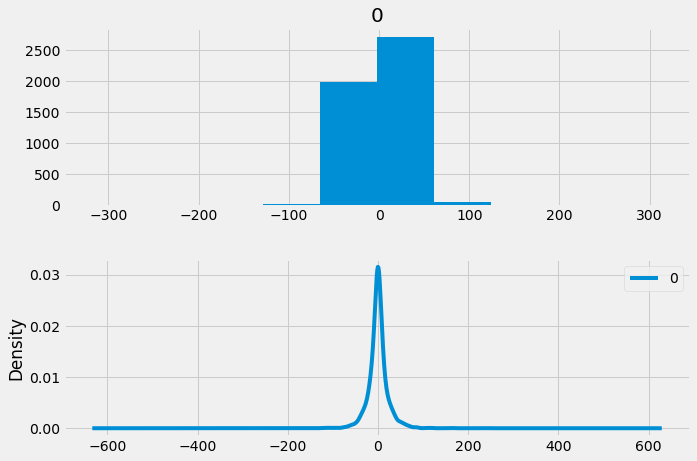

In [59]:
# calculer les résidus
residuals = residuals_arima(test, predictions)
# afficher les statistiques et la distribution des résidus
residuals_stats_plots(residuals)

L'erreur moyenne est de pratiquement nulle : -0.005108

In [60]:
bias = residuals.mean()
np.save('models/model_bias.npy', [bias])

##### Correction des prédictions

Nous tentons de corriger les prédictions en ajoutant le biais de -0.005108.

In [67]:
# ajouter le biais aux prédictions
bias = residuals.mean()[0]
predictions_bias = (np.array(predictions) + bias).tolist()
# réévaluer avec la rmse
rmse_bias = np.sqrt(mean_squared_error(test, predictions_bias))
rmse_bias

23.176278333721

Ici la correction par le biais n'améliore pas les prévisions.

### Autocorrélation dans les résidus

Si les erreurs résiduelles contiennent encore de l'autocorrélation, cela signifierait qu'il y a encore des propriétés à modéliser. 

In [68]:
# fonction pour afficher les  graphiques des ACF et PACF des erreurs résiduelles

def acf_pacf_plots(residuals):
    plt.figure()
    plt.subplot(211)
    plot_acf(residuals, ax=plt.gca())
    plt.subplot(212)
    plot_pacf(residuals, ax=plt.gca())
    plt.show()

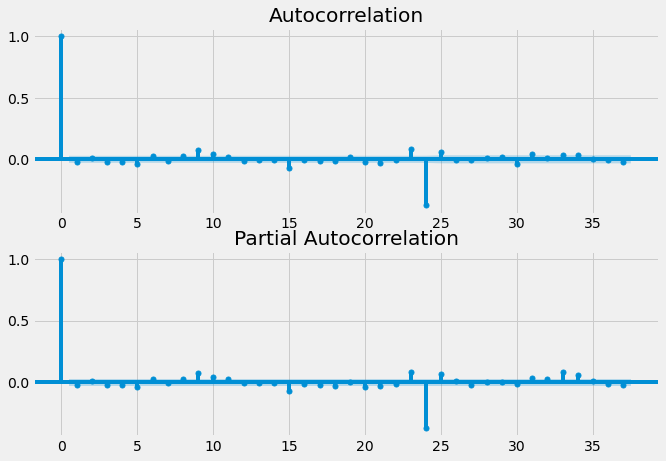

In [69]:
acf_pacf_plots(residuals)

Cela suggère que le modèle que nous avons construit a assez bien capturé l'autocorrélation dans notre série temporelle. 

# Validation du modèle

* On entraîne le modèle sur la totalité des données 'dataset'. (On ne corrigera pas avec le biais). 
* On effectue une prédiction à l'heure suivante pour voir si la valeur prédite est proche de la valeur attendue. 
* On valide le modèle en utilisant le 'validation set'. 

## Finaliser le modèle

In [70]:
# préparer les données
X = dataset.values
X = X.astype('float32')
# différencier les données
hours_in_day = 24
diff = difference(X, hours_in_day)
# entraîner le modèle ARIMA
model_finalized = ARIMA(diff, order=(2,0,0))
model_finalized_fit = model_finalized.fit()
# save model
model_finalized_fit.save('models/model_finalized.pkl')

## Effectuer une prédiction

In [71]:
# charger le modèle finalisé
model_finalized_fit = ARIMAResults.load('models/model_finalized.pkl')

In [72]:
# effectuer une prédiction à un pas
yhat = float(model_finalized_fit.forecast()[0])
hours_in_day = 24
yhat = inverse_difference(X, yhat, hours_in_day)
# afficher la prédiction
print("Predicted : %.3f" % yhat)

Predicted : 469.266


In [73]:
# afficher la valeur attendue
validation = pd.read_csv('datasets/validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation[0]

434.0

La valeur prédite est assez proche de la valeur attendue. 

## Valider le modèle

On a réservé précédemment les valeurs correspondant à une période de deux mois pour cette étape. 

* On charge le modèle finalisé. 
* On effectue les prédictions à l'aide du validation set. 
* On évalue le modèle avec la RMSE. 

In [74]:
# charger le modèle finalisé
model_finalized_fit = ARIMAResults.load('models/model_finalized.pkl')

In [75]:
# préparer les données
X = dataset.values
X = X.astype('float32')
y = validation.values
y = y.astype('float32')

# effectuer les 1e prédictions
predictions = list()
history = [x for x in X]
hours_in_day = 24
yhat = float(model_finalized_fit.forecast()[0])
yhat = inverse_difference(history, yhat, hours_in_day) 
predictions.append(yhat)
## mettre à jour 'history'
history.append(y[0])
## afficher pour vérifier
print("Predicted : %.3f, Expected : %.3f" % (yhat, y[0]))

# rolling forecasts
for i in range(1, len(y)):   # on commence à 1
    # différencier les données
    hours_in_day = 24
    diff = difference(history, hours_in_day)
    # prédire
    model = ARIMA(diff, order=(2,0,0))   
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, hours_in_day)
    predictions.append(yhat)
    # mettre à jour 'history'
    obs = y[i]
    history.append(obs)
    # afficher pour vérifier
    print('Predicted : %.3f, Expected : %.3f' % (yhat, obs))

Predicted : 469.266, Expected : 434.000
Predicted : 398.713, Expected : 423.000
Predicted : 422.501, Expected : 428.000
Predicted : 427.416, Expected : 431.000
Predicted : 427.666, Expected : 424.000
Predicted : 443.481, Expected : 437.000
Predicted : 470.389, Expected : 460.000
Predicted : 514.833, Expected : 501.000
Predicted : 546.568, Expected : 556.000
Predicted : 584.090, Expected : 557.000
Predicted : 527.821, Expected : 528.000
Predicted : 526.181, Expected : 531.000
Predicted : 541.445, Expected : 557.000
Predicted : 547.941, Expected : 567.000
Predicted : 561.794, Expected : 586.000
Predicted : 610.237, Expected : 611.000
Predicted : 662.301, Expected : 622.000
Predicted : 644.299, Expected : 643.000
Predicted : 621.905, Expected : 634.000
Predicted : 606.150, Expected : 596.000
Predicted : 536.961, Expected : 568.000
Predicted : 511.749, Expected : 513.000
Predicted : 490.877, Expected : 495.000
Predicted : 467.514, Expected : 497.000
Predicted : 472.216, Expected : 478.000


Predicted : 527.611, Expected : 520.000
Predicted : 549.405, Expected : 552.000
Predicted : 588.963, Expected : 648.000
Predicted : 660.584, Expected : 625.000
Predicted : 625.555, Expected : 657.000
Predicted : 663.850, Expected : 652.000
Predicted : 626.137, Expected : 655.000
Predicted : 602.756, Expected : 593.000
Predicted : 535.598, Expected : 522.000
Predicted : 495.394, Expected : 494.000
Predicted : 453.116, Expected : 437.000
Predicted : 429.567, Expected : 430.000
Predicted : 424.250, Expected : 420.000
Predicted : 425.995, Expected : 418.000
Predicted : 422.119, Expected : 418.000
Predicted : 423.082, Expected : 422.000
Predicted : 435.625, Expected : 439.000
Predicted : 455.460, Expected : 461.000
Predicted : 522.251, Expected : 503.000
Predicted : 541.484, Expected : 528.000
Predicted : 531.577, Expected : 538.000
Predicted : 499.717, Expected : 499.000
Predicted : 501.791, Expected : 498.000
Predicted : 519.080, Expected : 519.000
Predicted : 507.415, Expected : 528.000


Predicted : 428.546, Expected : 433.000
Predicted : 425.065, Expected : 435.000
Predicted : 438.646, Expected : 432.000
Predicted : 443.365, Expected : 445.000
Predicted : 468.836, Expected : 460.000
Predicted : 495.219, Expected : 478.000
Predicted : 501.371, Expected : 495.000
Predicted : 504.203, Expected : 506.000
Predicted : 481.975, Expected : 494.000
Predicted : 485.184, Expected : 491.000
Predicted : 525.774, Expected : 540.000
Predicted : 538.200, Expected : 535.000
Predicted : 557.340, Expected : 553.000
Predicted : 576.303, Expected : 584.000
Predicted : 595.500, Expected : 600.000
Predicted : 605.403, Expected : 599.000
Predicted : 607.448, Expected : 605.000
Predicted : 575.665, Expected : 550.000
Predicted : 530.151, Expected : 533.000
Predicted : 489.170, Expected : 496.000
Predicted : 469.605, Expected : 479.000
Predicted : 450.872, Expected : 466.000
Predicted : 461.321, Expected : 459.000
Predicted : 444.292, Expected : 436.000
Predicted : 435.169, Expected : 412.000


Predicted : 582.835, Expected : 570.000
Predicted : 555.276, Expected : 547.000
Predicted : 583.482, Expected : 590.000
Predicted : 562.701, Expected : 590.000
Predicted : 548.571, Expected : 525.000
Predicted : 502.494, Expected : 497.000
Predicted : 463.087, Expected : 473.000
Predicted : 469.678, Expected : 453.000
Predicted : 463.280, Expected : 451.000
Predicted : 422.535, Expected : 436.000
Predicted : 418.367, Expected : 422.000
Predicted : 402.534, Expected : 399.000
Predicted : 400.545, Expected : 400.000
Predicted : 396.353, Expected : 400.000
Predicted : 415.486, Expected : 408.000
Predicted : 417.413, Expected : 404.000
Predicted : 427.631, Expected : 407.000
Predicted : 421.740, Expected : 404.000
Predicted : 416.306, Expected : 406.000
Predicted : 429.209, Expected : 411.000
Predicted : 439.276, Expected : 415.000
Predicted : 449.822, Expected : 457.000
Predicted : 466.819, Expected : 476.000
Predicted : 513.098, Expected : 497.000
Predicted : 532.294, Expected : 471.000


Predicted : 411.592, Expected : 407.000
Predicted : 426.638, Expected : 422.000
Predicted : 441.520, Expected : 450.000
Predicted : 456.496, Expected : 484.000
Predicted : 471.625, Expected : 496.000
Predicted : 499.551, Expected : 488.000
Predicted : 500.577, Expected : 475.000
Predicted : 481.584, Expected : 490.000
Predicted : 487.571, Expected : 498.000
Predicted : 506.988, Expected : 512.000
Predicted : 531.840, Expected : 513.000
Predicted : 516.604, Expected : 523.000
Predicted : 515.556, Expected : 547.000
Predicted : 546.210, Expected : 567.000
Predicted : 578.720, Expected : 547.000
Predicted : 523.211, Expected : 509.000
Predicted : 513.026, Expected : 493.000
Predicted : 462.315, Expected : 464.000
Predicted : 452.864, Expected : 454.000
Predicted : 447.342, Expected : 443.000
Predicted : 427.984, Expected : 434.000
Predicted : 409.907, Expected : 417.000
Predicted : 410.609, Expected : 418.000
Predicted : 412.479, Expected : 419.000
Predicted : 416.738, Expected : 422.000


Predicted : 673.346, Expected : 611.000
Predicted : 549.082, Expected : 603.000
Predicted : 533.444, Expected : 591.000
Predicted : 547.007, Expected : 523.000
Predicted : 483.683, Expected : 477.000
Predicted : 465.379, Expected : 470.000
Predicted : 457.120, Expected : 468.000
Predicted : 447.335, Expected : 433.000
Predicted : 409.808, Expected : 415.000
Predicted : 409.521, Expected : 415.000
Predicted : 406.951, Expected : 405.000
Predicted : 413.052, Expected : 415.000
Predicted : 420.617, Expected : 424.000
Predicted : 445.227, Expected : 446.000
Predicted : 475.555, Expected : 472.000
Predicted : 508.612, Expected : 495.000
Predicted : 508.454, Expected : 517.000
Predicted : 497.269, Expected : 491.000
Predicted : 487.407, Expected : 498.000
Predicted : 527.371, Expected : 533.000
Predicted : 534.121, Expected : 532.000
Predicted : 534.221, Expected : 549.000
Predicted : 595.901, Expected : 585.000
Predicted : 586.975, Expected : 613.000
Predicted : 635.404, Expected : 671.000


Predicted : 457.386, Expected : 466.000
Predicted : 497.394, Expected : 502.000
Predicted : 534.646, Expected : 542.000
Predicted : 532.991, Expected : 543.000
Predicted : 509.050, Expected : 509.000
Predicted : 508.614, Expected : 502.000
Predicted : 521.717, Expected : 507.000
Predicted : 510.879, Expected : 490.000
Predicted : 494.395, Expected : 504.000
Predicted : 544.330, Expected : 549.000
Predicted : 578.941, Expected : 585.000
Predicted : 620.880, Expected : 584.000
Predicted : 575.490, Expected : 601.000
Predicted : 597.359, Expected : 588.000
Predicted : 524.431, Expected : 532.000
Predicted : 483.686, Expected : 482.000
Predicted : 451.629, Expected : 463.000
Predicted : 441.901, Expected : 432.000
Predicted : 431.135, Expected : 422.000
Predicted : 428.279, Expected : 408.000
Predicted : 417.814, Expected : 410.000
Predicted : 404.342, Expected : 414.000
Predicted : 418.959, Expected : 418.000
Predicted : 430.497, Expected : 423.000
Predicted : 449.641, Expected : 453.000


Predicted : 679.211, Expected : 627.000
Predicted : 548.611, Expected : 579.000
Predicted : 525.880, Expected : 511.000
Predicted : 493.623, Expected : 501.000
Predicted : 463.141, Expected : 491.000
Predicted : 473.135, Expected : 480.000
Predicted : 454.785, Expected : 461.000
Predicted : 453.907, Expected : 429.000
Predicted : 433.932, Expected : 424.000
Predicted : 424.537, Expected : 421.000
Predicted : 428.699, Expected : 429.000
Predicted : 452.327, Expected : 433.000
Predicted : 480.579, Expected : 443.000
Predicted : 509.918, Expected : 461.000
Predicted : 465.645, Expected : 467.000
Predicted : 481.557, Expected : 483.000
Predicted : 479.635, Expected : 514.000
Predicted : 539.581, Expected : 569.000
Predicted : 567.153, Expected : 550.000
Predicted : 544.268, Expected : 576.000
Predicted : 631.724, Expected : 609.000
Predicted : 643.816, Expected : 624.000
Predicted : 654.346, Expected : 655.000
Predicted : 720.349, Expected : 645.000
Predicted : 557.711, Expected : 614.000


RMSE : 22.488


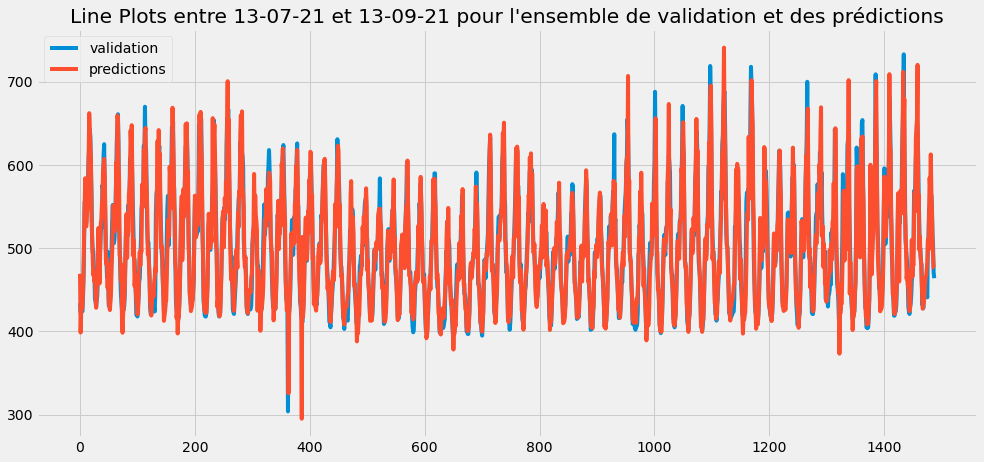

In [76]:
# afficher la performance finale
rmse = np.sqrt(mean_squared_error(y, predictions))
print('RMSE : %.3f' % rmse)
plt.figure(figsize=(15,7))
plt.plot(y, label = 'validation')
plt.plot(predictions, label = 'predictions')
plt.title("Line Plots entre 13-07-21 et 13-09-21 pour l'ensemble de validation et des prédictions")
plt.legend()
plt.show()

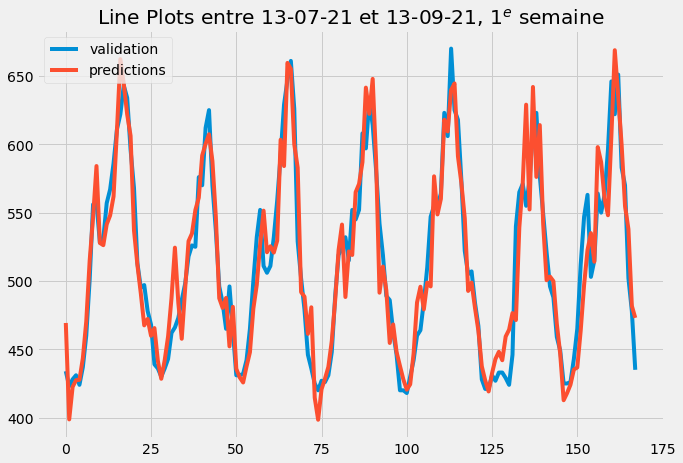

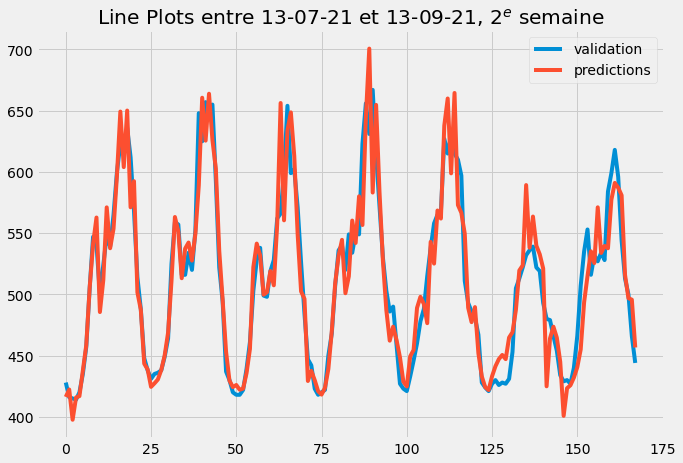

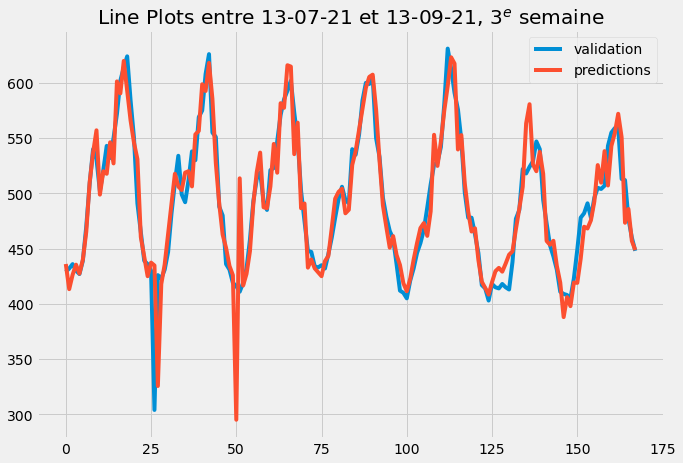

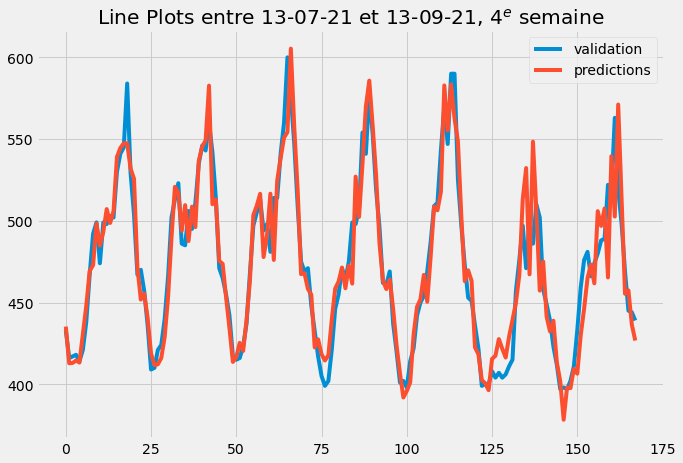

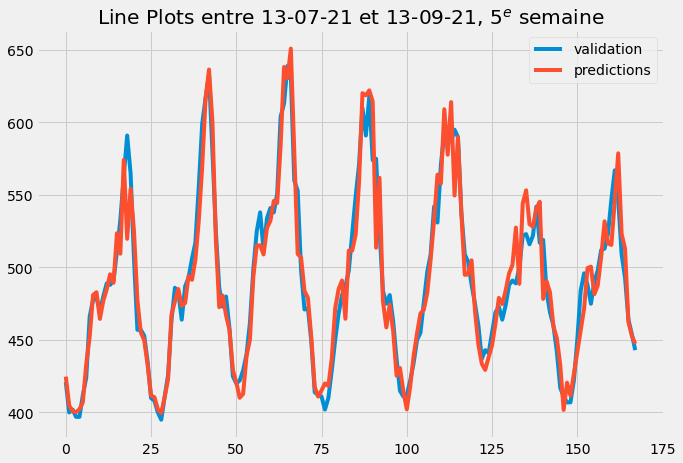

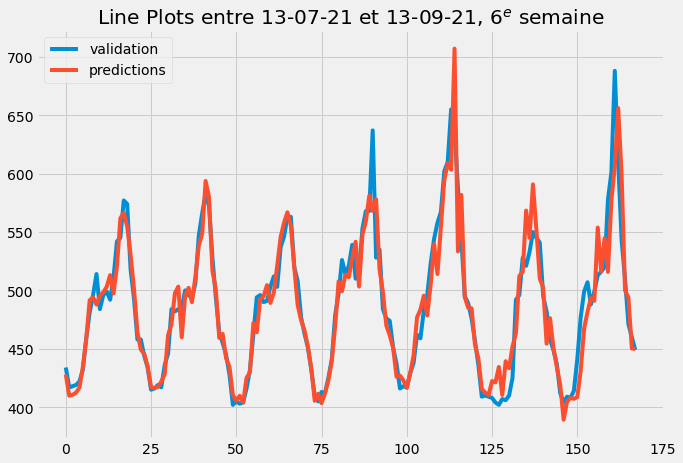

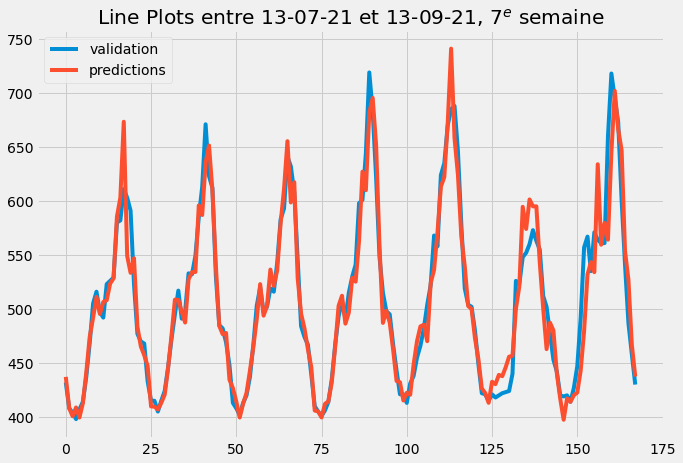

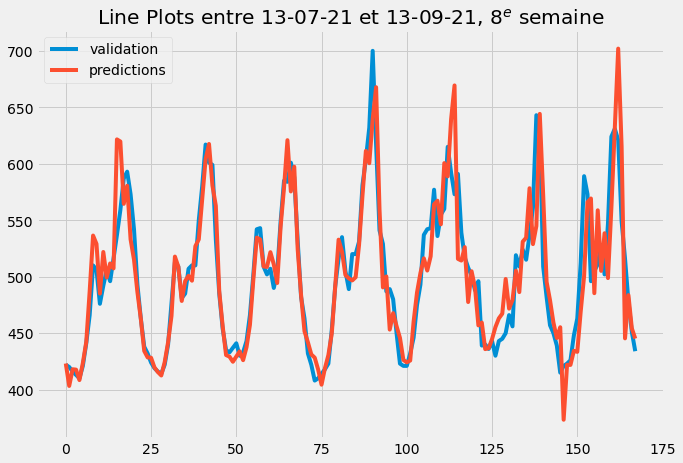

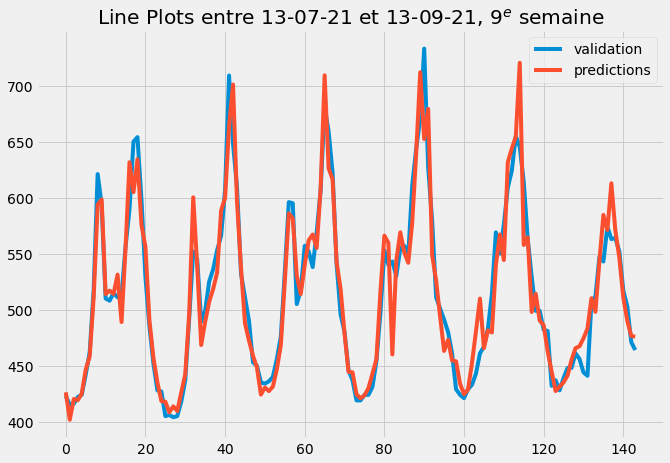

In [77]:
# affichage par semaine pour plus de visibilité
# 24h x 7j = 168h
for k in range(0,9):
    plt.plot(y[168*k : 168*(k+1)], label='validation')
    plt.plot(predictions[168*k : 168*(k+1)], label='predictions')
    plt.title(f"Line Plots entre 13-07-21 et 13-09-21, ${k+1}^e$ semaine")
    plt.legend()
    plt.show()

                 0
count  1488.000000
mean     -0.145881
std      22.494714
min    -130.750779
25%     -10.567401
50%      -0.373477
75%       9.622322
max     120.857636



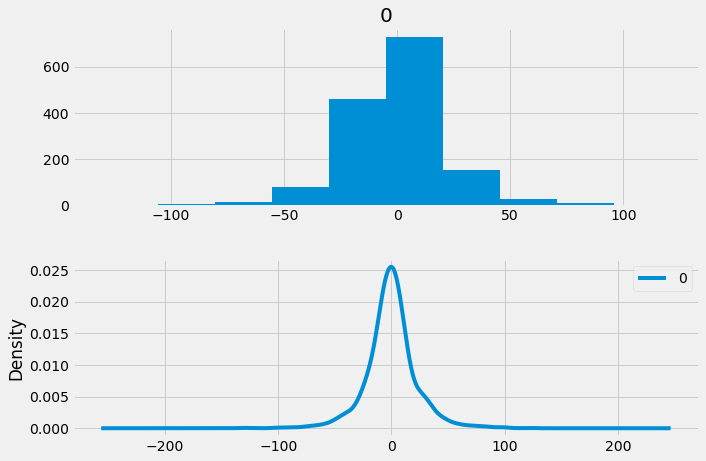

In [78]:
# calculer les résidus
residuals = residuals_arima(validation, predictions)
# afficher les statistiques et la distribution des résidus
residuals_stats_plots(residuals)

Le modèle semble convenable dans l'ensemble, mais il y a quelques erreurs notables :
* dans la 3e semaine, où le modèle semble reproduire le pic de la journée précédente
* quelques erreurs pour estimer le maximum journalier. 

Peut-être faudrait-il supprimer quelques outliers. 

## Modèle final

On entraîne le modèle sur la totalité des données, 'dataset' + 'validation'.  
Puis on l'enregistre. 

In [79]:
# totalité des données
data_co2_ext = pd.read_csv('datasets/data_co2_ext.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# préparer les données
X = data_co2_ext.values
X = X.astype('float32')
# différencier les données
hours_in_day = 24
diff = difference(X, hours_in_day)
# entraîner le modèle ARIMA
model_total_data = ARIMA(diff, order=(2,0,0))
model_total_data_fit = model_total_data.fit()
# sauvegarder le modèle
model_total_data_fit.save('models/model_total_data_fit.pkl')

---

# <u>Annexe</u> : <u>Quelques mots sur le modèle ARIMA</u>

## <u>Overview</u>

|Modèle ARIMA||
|:-----------------|:------------------------------------------------------------------------------------------|
|Idée              |capturer l'autocorrélation dans une série temporelle                                        |
|Utilisation       |pour la prévision                                                                                  |
|Concepts-clés     |l'ordre et la différenciation                                                              |
|Etapes            |1) differencier <br/> 2) entraîner un modèle ARMA sur la séries différenciées              |
|Notation du modèle|ARIMA(p,d,q)                                                                               |
|Hypothèse         |stationnarité de la série                                                                   |

## <u>Précisions</u>

ARIMA = AutoRegressive Integrated Moving Average

### <u>Etape 1 : Différenciation</u>
* Permet d'éliminer au préalable la tendance et/ou la saisonnalité
* On utilise la différenciation d'ordre 1 : $y_t' = y_t - y_{t-1}$
* L'ordre d est le nombre de fois où l'on applique cette différenciation d'ordre 1
    * d=0 : aucune différenciation
    * d=1 : différencier une fois
    * d=2 : différencier deux fois
    * Un ordre 1 ou 2 est généralement suffisant pour obtenir la stationnarité.
* Cette étape donne le I dans ARIMA. 
<br/>

### <u>Etape 2 : Modèle ARMA(p,q)</u>

* Equation du modèle ARMA(p,q) : $$Y_t = \beta_0 + \beta_1 Y_{t-1} + \dots + \beta_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}$$ 
    * partie AR(p) : $\beta_0 + \beta_1 Y_{t-1} + \dots + \beta_p Y_{t-p}$ 
    * partie MA(q) : $\theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}$ <br/><br/>
    
* Modèle qui capture différents types d'autocorrélations 
    * avec les p valeurs précédentes de la série $Y_{t-1}, \dots, Y_{t-p}$ 
    * avec les q erreurs de prédiction précédentes $\epsilon_{t-1}, \dots, \epsilon_{t-q}$. 

# Sources

* [machinelearningmastery : Time Series Forecast Study with Python: Monthly Sales of French Champagne](https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/)
* [Forecasting: Principles and Practice](https://otexts.com/fpp3/)
* [mooc de Galit Shmueli](https://www.youtube.com/watch?v=0xHf-SJ9Z9U&list=PLoK4oIB1jeK0LHLbZW3DTT05e4srDYxFq&index=27)



# Notes techniques

* Améliorer le modèle ?
    * utiliser un grid-search pour trouver d'autres paramètres (p,d,q) ? 
    * supprimer des outliers ? 